In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import AllTogether as t
import WhatHappened as t2
import seaborn as sns
%matplotlib inline

df = pd.read_csv('./survey_results_public.csv')
schema = pd.read_csv('./survey_results_schema.csv')
df.head()


,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
schema.head()

,Column,Question
0,Respondent,Respondent ID number
1,Professional,Which of the following best describes you?
2,ProgramHobby,Do you program as a hobby or contribute to ope...
3,Country,In which country do you currently live?
4,University,"Are you currently enrolled in a formal, degree..."


In [3]:
df.shape
#num_rows = df.shape[0] #Provide the number of rows in the dataset
#num_cols = df.shape[1] #Provide the number of columns in the dataset

(19102, 154)

In [4]:
# What happened
# A look at the data -- summary statistics
df.describe()


,Respondent,CareerSatisfaction,JobSatisfaction,HoursPerWeek,StackOverflowSatisfaction,Salary,ExpectedSalary
count,19102.000000,16102.000000,15253.000000,7721.000000,13452.000000,5009.000000,818.000000
mean,9551.500000,7.343932,7.000721,3.685922,8.357865,58341.398571,32231.521687
std,5514.416757,1.919330,2.128648,7.330691,1.405546,40753.384986,28543.877274
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4776.250000,6.000000,6.000000,0.000000,8.000000,27956.989247,4716.459735
50%,9551.500000,8.000000,7.000000,1.000000,8.000000,51612.903226,29784.946237
75%,14326.750000,9.000000,8.000000,3.000000,9.000000,83333.333333,50000.000000
max,19102.000000,10.000000,10.000000,40.000000,10.000000,195000.000000,120000.000000


In [5]:
df.columns

Index(['Respondent', 'Professional', 'ProgramHobby', 'Country', 'University',
       'EmploymentStatus', 'FormalEducation', 'MajorUndergrad', 'HomeRemote',
       'CompanySize',
       ...
       'StackOverflowMakeMoney', 'Gender', 'HighestEducationParents', 'Race',
       'SurveyLong', 'QuestionsInteresting', 'QuestionsConfusing',
       'InterestedAnswers', 'Salary', 'ExpectedSalary'],
      dtype='object', length=154)

In [6]:
df.dtypes
df.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [3]:
cat_df = df.select_dtypes(include=['object','O']) 
cat_df.shape

(19102, 147)

In [8]:
set(cat_df)

{'AnnoyingUI',
 'AssessJobCommute',
 'AssessJobCompensation',
 'AssessJobDept',
 'AssessJobDiversity',
 'AssessJobExp',
 'AssessJobFinances',
 'AssessJobIndustry',
 'AssessJobLeaders',
 'AssessJobOffice',
 'AssessJobProduct',
 'AssessJobProfDevel',
 'AssessJobProjects',
 'AssessJobRemote',
 'AssessJobRole',
 'AssessJobTech',
 'AuditoryEnvironment',
 'BoringDetails',
 'BuildingThings',
 'ChallengeMyself',
 'ChangeWorld',
 'CheckInCode',
 'ClickyKeys',
 'CollaborateRemote',
 'CompanySize',
 'CompanyType',
 'CompetePeers',
 'Country',
 'CousinEducation',
 'Currency',
 'DeveloperType',
 'DifficultCommunication',
 'DiversityImportant',
 'EducationImportant',
 'EducationTypes',
 'EmploymentStatus',
 'EnjoyDebugging',
 'EquipmentSatisfiedCPU',
 'EquipmentSatisfiedMonitors',
 'EquipmentSatisfiedRAM',
 'EquipmentSatisfiedRW',
 'EquipmentSatisfiedStorage',
 'ExCoder10Years',
 'ExCoderActive',
 'ExCoderBalance',
 'ExCoderBelonged',
 'ExCoderNotForMe',
 'ExCoderReturn',
 'ExCoderSkills',
 'ExCoder

In [2]:
Num_df=df.select_dtypes(include=['float64','int'])
Num_df.describe()

,Respondent,CareerSatisfaction,JobSatisfaction,HoursPerWeek,StackOverflowSatisfaction,Salary,ExpectedSalary
count,19102.000000,16102.000000,15253.000000,7721.000000,13452.000000,5009.000000,818.000000
mean,9551.500000,7.343932,7.000721,3.685922,8.357865,58341.398571,32231.521687
std,5514.416757,1.919330,2.128648,7.330691,1.405546,40753.384986,28543.877274
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4776.250000,6.000000,6.000000,0.000000,8.000000,27956.989247,4716.459735
50%,9551.500000,8.000000,7.000000,1.000000,8.000000,51612.903226,29784.946237
75%,14326.750000,9.000000,8.000000,3.000000,9.000000,83333.333333,50000.000000
max,19102.000000,10.000000,10.000000,40.000000,10.000000,195000.000000,120000.000000


In [10]:
set(Num_df)

{'CareerSatisfaction',
 'ExpectedSalary',
 'HoursPerWeek',
 'JobSatisfaction',
 'Respondent',
 'Salary',
 'StackOverflowSatisfaction'}

In [11]:
# A look at the data --- missing value and non missing value
no_nulls = set(df.columns[df.isnull().sum()==0])#Provide a set of columns with 0 missing values.
no_nulls


{'Country',
 'EmploymentStatus',
 'FormalEducation',
 'Professional',
 'ProgramHobby',
 'Respondent',
 'University'}

In [12]:
most_missing_cols = set(Num_df.columns[Num_df.isnull().mean() > 0.5])#Provide a set of columns with more than 75% of the values missing

most_missing_cols

{'ExpectedSalary', 'HoursPerWeek', 'Salary'}

In [13]:
no_nulls = set(Num_df.columns[Num_df.isnull().sum()==0])#Provide a set of columns with 0 missing values.
no_nulls

{'Respondent'}

In [17]:
set(schema[schema['Column']=='StackOverflowMetaChat']['Question'])
set(schema[schema['Column']=='StackOverflowAdsRelevant']['Question'])
set(schema[schema['Column']=='StackOverflowJobSearch']['Question'])
set(schema[schema['Column']=='StackOverflowCommunity']['Question'])


{'I feel like a member of the Stack Overflow community'}

In [20]:
# A look at the data -- data value in feature
status_vals = df.StackOverflowAdsRelevant.value_counts()
status_vals 
#Provide a pandas series of the counts for each Professional status

Somewhat agree       5082
Disagree             3232
Agree                1811
Strongly disagree    1086
Strongly agree        316
Name: StackOverflowAdsRelevant, dtype: int64

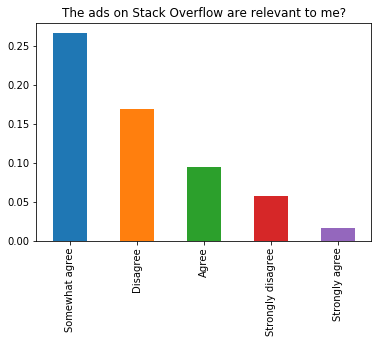

In [21]:
# The below should be a bar chart of the proportion of individuals in each professional category if your status_vals
# is set up correctly.

(status_vals/df.shape[0]).plot(kind="bar");
plt.title("The ads on Stack Overflow are relevant to me?");

In [ ]:
# Using statistics to answer questions and draw insight 
prop_stacks = 1 - df.isnull()['StackOverflowSatisfaction'].mean()

prop_stacks

In [39]:
df.groupby(['StackOverflowCommunity']).mean()['StackOverflowSatisfaction'].sort_values().reset_index()

,StackOverflowCommunity,StackOverflowSatisfaction
0,Strongly disagree,7.339367
1,Disagree,8.121535
2,Somewhat agree,8.522144
3,Agree,8.734412
4,Strongly agree,9.152273


In [43]:
df.groupby(['StackOverflowMetaChat']).mean()['StackOverflowSatisfaction'].sort_values().reset_index()



,StackOverflowMetaChat,StackOverflowSatisfaction
0,At least once each week,8.228758
1,Haven't done at all,8.373738
2,Once or twice,8.378182
3,Several times,8.403846
4,At least once each day,8.554348


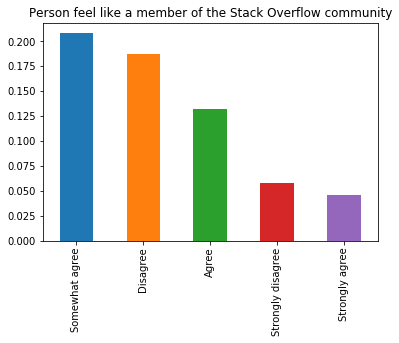

In [48]:
# A look at the data -- data value in feature
status_vals = df.StackOverflowCommunity.value_counts()
status_vals 
#Provide a pandas series of the counts for each Professional status

# The below should be a bar chart of the proportion of individuals in each professional category if your status_vals
# is set up correctly.

(status_vals/df.shape[0]).plot(kind="bar");
plt.title("Person feel like a member of the Stack Overflow community");

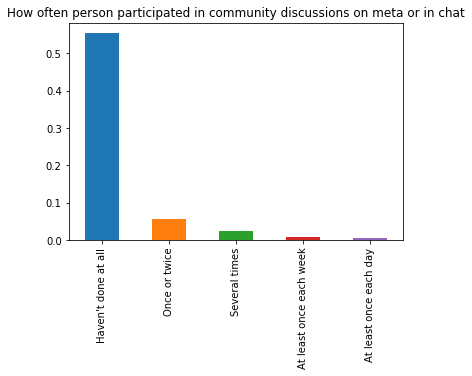

In [46]:
# A look at the data -- data value in feature
count_vals = df.StackOverflowMetaChat.value_counts()#Provide a pandas series of the counts for each Country

# The below should be a bar chart of the proportion of the top 10 countries for the
# individuals in your count_vals if it is set up correctly.

(count_vals[:10]/df.shape[0]).plot(kind="bar");
plt.title("How often person participated in community discussions on meta or in chat");

In [54]:
# Using statistics to answer questions and draw insight

df.groupby(['StackOverflowAdsRelevant']).mean()['StackOverflowSatisfaction'].sort_values().dropna().reset_index()


,StackOverflowAdsRelevant,StackOverflowSatisfaction
0,Strongly disagree,7.883978
1,Disagree,8.163366
2,Somewhat agree,8.467336
3,Agree,8.718940
4,Strongly agree,9.132911


In [49]:
df['StackOverflowSatisfaction'].isnull().mean()

0.29578054653962937

In [52]:
df.groupby(['StackOverflowCommunity']).mean()['StackOverflowSatisfaction'].sort_values().dropna().reset_index()

,StackOverflowCommunity,StackOverflowSatisfaction
0,Strongly disagree,7.339367
1,Disagree,8.121535
2,Somewhat agree,8.522144
3,Agree,8.734412
4,Strongly agree,9.152273


In [53]:
df.groupby(['StackOverflowMetaChat']).mean()['StackOverflowSatisfaction'].sort_values().dropna().reset_index()

,StackOverflowMetaChat,StackOverflowSatisfaction
0,At least once each week,8.228758
1,Haven't done at all,8.373738
2,Once or twice,8.378182
3,Several times,8.403846
4,At least once each day,8.554348


In [57]:
df.groupby(['StackOverflowJobSearch']).mean()['StackOverflowSatisfaction'].sort_values().dropna().reset_index()


,StackOverflowJobSearch,StackOverflowSatisfaction
0,Haven't done at all,8.317593
1,Once or twice,8.477204
2,Several times,8.592666
3,At least once each week,8.704120
4,At least once each day,8.921569


In [66]:
# identify categorical and non categorical features

cat_df = df.select_dtypes(include=['object']) # Subset to a dataframe only holding the categorical columns

# Print how many categorical columns are in the dataframe
cat_df.shape[1]
np.sum(np.sum(cat_df.isnull())/cat_df.shape[0] == 0)
# 50% categorical columns are null
np.sum(np.sum(cat_df.isnull())/cat_df.shape[0] > .5)
# 75% categorical columns are null
np.sum(np.sum(cat_df.isnull())/cat_df.shape[0] > .75)

13

In [74]:
df['StackOverflowSatisfaction'].describe().reset_index()

,index,StackOverflowSatisfaction
0,count,13452.000000
1,mean,8.357865
2,std,1.405546
3,min,0.000000
4,25%,8.000000
5,50%,8.000000
6,75%,9.000000
7,max,10.000000


In [45]:
# Mean function
fill_mean = lambda col: col.fillna(col.mean())
Num_df.apply(fill_mean, axis=0)

In [7]:
# Drop rows with missing salary values
df = df.dropna(subset=['StackOverflowSatisfaction'], axis=0)
y = df['StackOverflowSatisfaction']
#Drop respondent and expected salary columns
df = df.drop(['Respondent', 'StackOverflowSatisfaction'], axis=1)

In [8]:
num_vars = df.select_dtypes(include=['float', 'int']).columns
for col in num_vars:
        df[col].fillna((df[col].mean()), inplace=True)

In [9]:
# Dummy the categorical variables
cat_vars = df.select_dtypes(include=['object']).copy().columns
for var in  cat_vars:
    # for each cat add dummy var, drop original column
    df = pd.concat([df.drop(var, axis=1), pd.get_dummies(df[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)
    
X = df

In [10]:
X.shape

(13452, 22479)

In [ ]:

#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42) 

lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit
        
#Predict and score the model
y_test_preds = lm_model.predict(X_test) 
"The r-squared score for the model using only quantitative variables was {} on {} values.".format(r2_score(y_test, y_test_preds), len(y_test))

In [ ]:
#Predict using your model
y_test_preds = lm_model.predict(X_test)
y_train_preds = lm_model.predict(X_train)

#Score using your model
test_score = r2_score(y_test, y_test_preds)
train_score = r2_score(y_train, y_train_preds)
"The r-squared score for the model using only quantitative variables was {} on {} values.".format(r2_score(y_test, y_test_preds), len(y_test))

In [ ]:
print("The number of salaries in the original dataframe is " + str(np.sum(df.StackOverflowSatisfaction.notnull()))) 
print("The number of salaries predicted using our model is " + str(len(y_test_preds)))
print("This is bad because we only predicted " + str((len(y_test_preds))/np.sum(df.StackOverflowSatisfaction.notnull())) + " of the salaries in the dataset.")